In [1]:
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.linear_model import ridge_regression
import torch

In [5]:
dat=loadmat('/home/maria/Downloads/natimg2800_M170717_MP033_2017-08-20.mat')

In [6]:
print(dat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'db', 'med', 'stat', 'stim'])


In [7]:
print(dat['med'])

[[110   6  70]
 [146   4  70]
 [178   6  70]
 ...
 [460 922 420]
 [430 932 420]
 [458 978 420]]


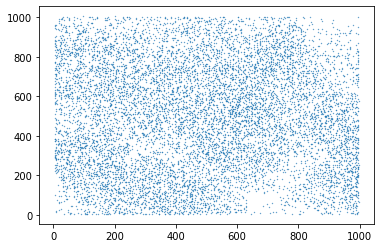

In [10]:
plt.scatter(dat['med'][:,0],dat['med'][:,1],s=0.1)

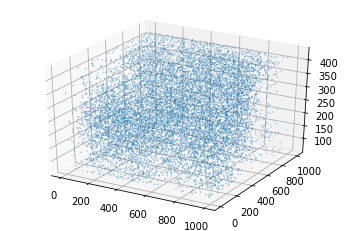

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dat['med'][:,0],dat['med'][:,1],dat['med'][:,2],s=0.1)

In [16]:
np.savetxt('cells.csv',dat['med'])

In [5]:
def PCA(images,k=100):
    images=torch.cuda.FloatTensor(images)
    mean_im=torch.mean(images,dim=0)
    centered=torch.sub(images,mean_im)
    print(centered.size())
    U,S,V=torch.svd(centered)
    #print(U,S,V)
    S=torch.diag(S)
    print(U.size())
    reduced=torch.matmul(U[:,:k],S[:k,:k])
    #print(reduced.size())
    reduced=torch.matmul(reduced,V[:,:k].t())
    return np.array(reduced.cpu())


In [29]:
dat=loadmat('C:/Users/koester_lab/Downloads/natimg2800_M170714_MP032_2017-08-07.mat')

In [30]:
stim=dat['stim']['istim'][0][0]-1

In [35]:
stim=stim.flatten()

In [34]:
print(stim.shape)

(5880, 1)


In [36]:
resp = dat['stim'][0]['resp'][0]
resp=resp[stim!=2800]

In [37]:
print(resp.shape)

(5600, 9039)


In [38]:
stim=stim[stim!=2800]

In [39]:
print(stim.shape)

(5600,)


In [17]:
images=loadmat('C:/Users/koester_lab/Downloads/images_natimg2800_all.mat')['imgs']
images=images.transpose((2,0,1))
images=images.reshape((2800,68*270))
reduced_images=PCA(images)

torch.Size([2800, 18360])
torch.Size([2800, 2800])


In [10]:
print(reduced_images.shape)

(2800, 18360)


In [24]:
stim=stim-1

In [25]:
print(stim)

[[   2]
 [ 250]
 [1239]
 ...
 [1370]
 [2204]
 [2645]]


In [16]:
print(reduced_images)

[[  3.5101242  -0.6444367  -4.9185348 ... -23.278278  -12.229514
   -2.4875255]
 [ -4.335593   -7.7020016  -6.6088195 ... -11.607277   -9.379435
   -4.5201993]
 [ -3.755824   -0.7308923   2.4872828 ...   7.5400057   3.6827154
   -0.7330082]
 ...
 [ -1.654186   -2.981735   -3.3771992 ...   2.7723458   2.5509167
    0.5269364]
 [ -2.5585384 -17.3508    -32.06096   ... -27.747036  -13.552687
   -1.9114623]
 [ -3.159641   -5.759202   -9.270354  ... -12.182277   -7.1758704
   -2.419757 ]]


In [28]:
stim=stim[stim!=2800]

In [26]:
def construct_y(reduced_images,stim):
    y=[]
    for i in stim.flatten():
        y.append(reduced_images[i,:])
    y=np.array(y)
    print(y.shape)
    return y

y=construct_y(reduced_images,stim)

IndexError: index 2800 is out of bounds for axis 0 with size 2800

In [27]:
print(np.unique(stim))

[   0    1    2 ... 2798 2799 2800]


In [40]:
reduced_images_=reduced_images[stim]

In [41]:
print(reduced_images_.shape)

(5600, 18360)


In [ ]:
ep=EnsemblePursuit()
ep.fit(dat)

In [ ]:
alpha=5000
reg=ridge_regression(reduced_images_,av_resp,alpha=alpha)